In [1]:
?printstyled

search: printstyled



```
printstyled([io], xs...; bold::Bool=false, underline::Bool=false, blink::Bool=false, reverse::Bool=false, hidden::Bool=false, color::Union{Symbol,Int}=:normal)
```

Print `xs` in a color specified as a symbol or integer, optionally in bold.

Keyword `color` may take any of the values `:normal`, `:default`, `:bold`, `:black`, `:blink`, `:blue`, `:cyan`, `:green`, `:hidden`, `:light_black`, `:light_blue`, `:light_cyan`, `:light_green`, `:light_magenta`, `:light_red`, `:light_white`, `:light_yellow`, `:magenta`, `:nothing`, `:red`, `:reverse`, `:underline`, `:white`, or  `:yellow` or an integer between 0 and 255 inclusive. Note that not all terminals support 256 colors.

Keywords `bold=true`, `underline=true`, `blink=true` are self-explanatory. Keyword `reverse=true` prints with foreground and background colors exchanged, and `hidden=true` should be invisible in the terminal but can still be copied. These properties can be used in any combination.

See also [`print`](@ref), [`println`](@ref), [`show`](@ref).

!!! compat "Julia 1.7"
    Keywords except `color` and `bold` were added in Julia 1.7.



In [21]:
printstyled("π = ", big(π); color=:red); println()

π = 3.141592653589793238462643383279502884197169399375105820974944592307816406286198


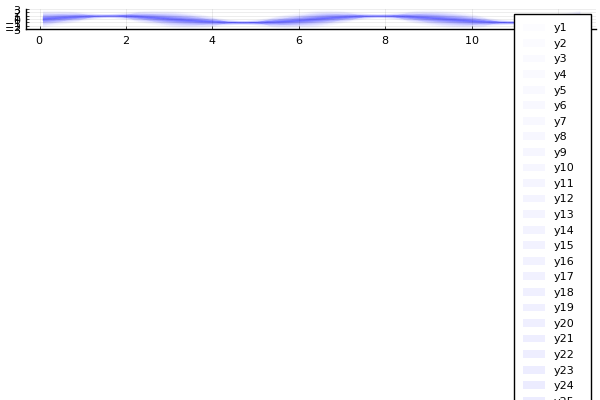

In [28]:
using Distributions, SmoothingSplines, Plots; 
pyplot()

f(x) = sin(x)    # baseline function for this example

# GENERATE INPUT DATA:
σy = 1.0    # stdev relative to curve f(x)
npoints = 100
nsamples = 50
X = vcat([rand(Uniform(0, 4π), npoints) for _ in 1:nsamples]...)
Y = @. f.(X) + rand(Normal(0, σy*abs(cos(X))+0.1))    # variable stdev

# FIT NORMAL DISTRIBUTIONS WITH PARAMETERS: μ(x) and σ(x)
nx = 100;  # number of divisions of x-axis to estimate distribution
x = LinRange(0, 4π, nx)
xᵢ = [(x[i], x[i+1]) for i in 1:length(x)-1]
x₀ = mean.(xᵢ)
μ = similar(x₀); σ = similar(x₀)
for (i,xᵢ) in pairs(xᵢ)
    ix = xᵢ[1] .<= X .<= xᵢ[2]
    h = fit(Normal, Y[ix])
    μ[i] = h.μ;  σ[i] = h.σ
end

# FIT SMOOTHING SPLINES TO ABOVE
using SmoothingSplines
splμ = fit(SmoothingSpline,x₀, μ, 0.05)      # λ=0.05
splσ = fit(SmoothingSpline,x₀, σ, 0.02)      # λ=0.02
μp = SmoothingSplines.predict(splμ, x₀)
σp = SmoothingSplines.predict(splσ, x₀)

# PLOT DATA:
p1 = scatter(X,Y, ms=1, msw=-0, mc=:blue, label=false)
plot!(f, lc=:cyan, lw=1.5, label="sin(x) baseline")
plot!(x₀, μ, lc=:red, lw=1, ls=:dash, label="mean μ(x)")
plot!(x₀, σ, lc=:lime, lw=1, ls=:dash, label="stdev σ(x)")
plot!(x₀, μp, lc=:red, lw=1, label="spline μp(x)")
plot!(x₀, σp, lc=:lime, lw=1, label="spline σp(x)")

# PLOT RIBBONS WITH ALPHA TRANSPARENCY SCALED:
N = 300  # number of ribbon slices
qq = @. quantile(Normal(μp, σp), LinRange(0.01, 0.99,N))
α = [LinRange(0.01,0.4,N÷2); LinRange(0.4,0.01,N÷2)]
p2 = plot(legend=false)
for i in 2:N-1
    yᵢ = getindex.(qq, i)
    dy = yᵢ - getindex.(qq, i-1)
    plot!(x₀, yᵢ - dy/2, lw=0, color=:blue, fillalpha=α[i], ribbon=dy)
end
p2
temp = [-10 -20; -30 -40 ]
plot!(p2, temp, ylims = (-3,3), leg=true, label = ["a" "b"])

In [26]:
text("hoge", :red)

Plots.PlotText("hoge", Plots.Font("sans-serif", 14, :hcenter, :vcenter, 0.0, RGB{N0f8}(1.0,0.0,0.0)))